# Reading data & libraries, data cleaning

In [21]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
vi_map=pd.read_csv ('/Users/ghfmhf/git/data-question-2-xtreme-united/vi_map_df.csv')
vi_desc=pd.read_csv ('/Users/ghfmhf/git/data-question-2-xtreme-united/vi_desc_matches.csv')

In [23]:
seasonv={
    1:'winter',
    2:'winter',
    3:'spring',
    4:'spring',
    5:'spring',
    6:'summer',
    7:'summer',
    8:'summer',
    9:'fall',
    10:'fall',
    11:'fall',
    12:'winter'
}

In [24]:
# Eliminate non-used columns
vi_map_filter=vi_map.drop(['Unnamed: 0','Property Address', 'Property APN','State', 'Property Owner', 'Reported Problem', 'Last Activity', 'Violations Noted', 'Mapped Location', 'text','master_category', 'lat_lng', 'lat', 'lng'],1)

In [25]:
vi_map_filter.head(5)

,Request #,Date Received,City,ZIP,Complaint Source,Status,Council District,Last Activity Date,Last Activity Result,category
0,15-1114246,02/11/2015,NASHVILLE,37208.0,INSPECTOR REPORTED,DONE,2.0,12/08/2016,VIORES,prop
1,17-1153010,02/10/2017,NASHVILLE,37207.0,PHONE,DONE,5.0,07/13/2017,DMJCFINE,prop
2,17-1153720,03/01/2017,ANTIOCH,37013.0,INSPECTOR REPORTED,DONE,28.0,07/13/2017,DMJCFINE,prop
3,17-1159789,06/12/2017,NASHVILLE,37214.0,PHONE,DONE,13.0,07/06/2017,VIORES,prop
4,17-1154177,03/10/2017,NASHVILLE,37207.0,INSPECTOR REPORTED,DONE,3.0,04/06/2017,DMJUSTCT,prop


# number of claims in each category

In [26]:
# Group claims by category and count each group (numbers that go into the first chart)
vi_cat_cnt=vi_map_filter.groupby(by='category',as_index=False).count()

In [47]:
vi_cat_cnt.columns

Index(['cat', 'freq'], dtype='object')

In [28]:
# Keep only the two columns needed for the first chart
vi_cat_cnt=vi_cat_cnt.drop(['Date Received', 'City', 'ZIP', 'Complaint Source',
       'Status', 'Council District', 'Last Activity Date',
       'Last Activity Result'],1)

In [29]:
vi_cat_cnt

,category,Request #
0,animals,171
1,dumping,2362
2,electrical,470
3,illegal_business_operations,5935
4,inspector_notes,7413
5,misc,1419
6,occupancy,2715
7,overgrowth,12698
8,prop,12970
9,trash,15876


In [30]:
# label the columns 
vi_cat_cnt.columns=['cat','freq']

In [31]:
vi_cat_cnt

,cat,freq
0,animals,171
1,dumping,2362
2,electrical,470
3,illegal_business_operations,5935
4,inspector_notes,7413
5,misc,1419
6,occupancy,2715
7,overgrowth,12698
8,prop,12970
9,trash,15876


In [32]:
# assign number of the categories to X
x=np.arange(0,vi_cat_cnt['cat'].count())

In [33]:
# x

In [34]:
# vi_cat_cnt['freq']

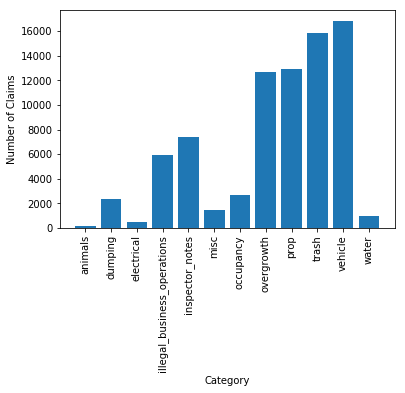

In [35]:
# drawing charts and labels
plt.bar(x,np.array(vi_cat_cnt['freq']))
plt.ylabel('Number of Claims')
plt.xlabel('Category')
plt.xticks(x,vi_cat_cnt['cat'],rotation=90)
plt.savefig('/Users/ghfmhf/git/data-question-2-xtreme-united/Chart_1.png')
plt.show()

# distribution of claims over seasons

In [36]:
vi_map_filter['Month']=pd.to_numeric(vi_map_filter['Date Received'].str[:2]) #pick the month
vi_map_filter['Season']=(((vi_map_filter['Month']%12)//3))

# [(month%12 + 3)//3 for month in range(1, 13)]
# vi_map_filter

In [37]:
vi_cat_sn=vi_map_filter.drop(['Date Received', 'City', 'ZIP',
       'Complaint Source', 'Status', 'Council District', 'Last Activity Date',
       'Last Activity Result', 'Month'],1)

In [38]:
vi_cat_sn.head(3)

,Request #,category,Season
0,15-1114246,prop,0
1,17-1153010,prop,0
2,17-1153720,prop,1


In [39]:
vi_cat_sn.columns

Index(['Request #', 'category', 'Season'], dtype='object')

In [40]:
vi_catsn=vi_cat_sn.groupby(by=['category','Season'],as_index=False).count()


In [41]:
vi_catsn.columns=['cat','season','freq']
vi_catsn.head(3)

,cat,season,freq
0,animals,0,27
1,animals,1,50
2,animals,2,54


In [42]:
#creating pivot
vi_catsn_pvt=vi_catsn.pivot(index='season',columns='cat',values='freq').fillna(0)
vi_catsn_pvt

cat,animals,dumping,electrical,illegal_business_operations,inspector_notes,misc,occupancy,overgrowth,prop,trash,vehicle,water
season,,,,,,,,,,,,
0,27,458,107,1307,1239,264,556,171,2394,3591,3685,187
1,50,636,119,1716,1338,422,831,3692,3822,4428,4313,281
2,54,640,125,1573,2583,413,724,6461,3745,4421,4639,317
3,40,628,119,1339,2253,320,604,2374,3009,3436,4211,208


In [43]:
cat_lab=np.array(vi_catsn['cat'].drop_duplicates())
cat_lab

array(['animals', 'dumping', 'electrical', 'illegal_business_operations',
       'inspector_notes', 'misc', 'occupancy', 'overgrowth', 'prop',
       'trash', 'vehicle', 'water'], dtype=object)

In [44]:
sn_lab=np.array(vi_cat_sn['Season'].drop_duplicates())
sn_lab

array([0, 1, 2, 3])

In [45]:
x=np.arange(0,vi_catsn_pvt.shape[1])
x
y0=np.array(vi_catsn_pvt.iloc[0,:])
y1=np.array(vi_catsn_pvt.iloc[1,:])
y2=np.array(vi_catsn_pvt.iloc[2,:])
y3=np.array(vi_catsn_pvt.iloc[3,:])

y3


array([  40,  628,  119, 1339, 2253,  320,  604, 2374, 3009, 3436, 4211,
        208])

/Users/ghfmhf/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 27 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/Users/ghfmhf/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 50 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/Users/ghfmhf/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 54 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/Users/ghfmhf/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 40 instances.
A proxy artist may be used instead

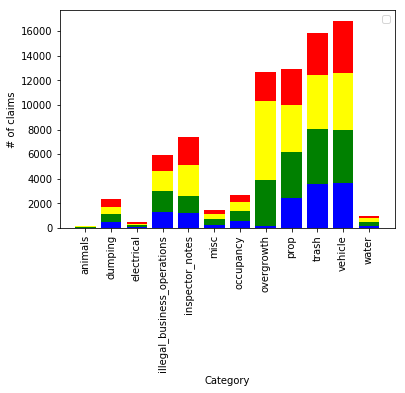

In [46]:
b0=plt.bar(x,y0,color='blue') #winter
b1=plt.bar(x,y1,bottom=y0,color='green') #spring
b2=plt.bar(x,y2,bottom=y1+y0,color='yellow') #summer
b3=plt.bar(x,y3,bottom=y2+y1+y0,color='red')#authumn

plt.xlabel('Category')
plt.ylabel('# of claims')
plt.xticks(x,cat_lab,rotation=90)
plt.savefig('/Users/ghfmhf/git/data-question-2-xtreme-united/Chart_2.png')

plt.legend((y0[0],y1[0],y2[0],y3[0]),('winter','spring','summer','authumn'))

plt.show()

# Number of claims among regions

In [82]:
vi_map_filter.columns

Index(['Request #', 'Date Received', 'City', 'ZIP', 'Complaint Source',
       'Status', 'Council District', 'Last Activity Date',
       'Last Activity Result', 'category', 'Month', 'Season'],
      dtype='object')

In [83]:
vi_zip=vi_map_filter.drop(['Date Received', 'City', 'Complaint Source',
       'Status', 'Council District', 'Last Activity Date',
       'Last Activity Result', 'Month', 'Season'],1)
vi_zip['ZIP']=vi_zip['ZIP'].fillna(36900)

In [106]:
vi_ZZ=vi_zip['ZIP'].replace(0,36900)
# vi_zip['ZIP'].head(30)
vi_zip['ZIP']=vi_ZZ

In [107]:
vi_zip['reg']=(vi_zip['ZIP']//100)-369
# vi_zip['reg'].replace(-369,0)
    
vi_zip.head(3)

,Request #,ZIP,category,reg
0,15-1114246,37208.0,prop,3.0
1,17-1153010,37207.0,prop,3.0
2,17-1153720,37013.0,prop,1.0


In [108]:
vi_catzp=vi_zip.groupby(by=['category','reg'],as_index=False).count()
vi_catzp.columns=['cat','reg','freq','zip']
vi_catzp.head(5)


,cat,reg,freq,zip
0,animals,0.0,3,3
1,animals,1.0,38,38
2,animals,2.0,22,22
3,animals,3.0,108,108
4,dumping,0.0,11,11


In [113]:
#creating pivot
vi_catzp_pvt=vi_catzp.pivot(index='reg',columns='cat',values='freq').fillna(0)
vi_catzp_pvt

cat,animals,dumping,electrical,illegal_business_operations,inspector_notes,misc,occupancy,overgrowth,prop,trash,vehicle,water
reg,,,,,,,,,,,,
0.0,3,11,6,50,40,51,10,124,70,111,117,3
1.0,38,473,59,923,1197,204,572,2243,2389,2999,4110,154
2.0,22,207,62,713,687,153,284,1598,2540,2069,1934,122
3.0,108,1671,343,4249,5489,1011,1849,8733,7971,10697,10687,714


In [114]:
cat_lab=np.array(vi_catzp['cat'].drop_duplicates())
cat_lab

array(['animals', 'dumping', 'electrical', 'illegal_business_operations',
       'inspector_notes', 'misc', 'occupancy', 'overgrowth', 'prop',
       'trash', 'vehicle', 'water'], dtype=object)

In [115]:
zp_lab=np.array(vi_zip['reg'].drop_duplicates())
zp_lab

array([ 3.,  1.,  2.,  0.])

In [116]:
x=np.arange(0,vi_catsn_pvt.shape[1])
x
y0=np.array(vi_catzp_pvt.iloc[0,:])
y1=np.array(vi_catzp_pvt.iloc[1,:])
y2=np.array(vi_catzp_pvt.iloc[2,:])
y3=np.array(vi_catzp_pvt.iloc[3,:])

y3


array([  108,  1671,   343,  4249,  5489,  1011,  1849,  8733,  7971,
       10697, 10687,   714])

/Users/ghfmhf/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 3 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/Users/ghfmhf/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 38 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/Users/ghfmhf/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 22 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/Users/ghfmhf/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 108 instances.
A proxy artist may be used instead

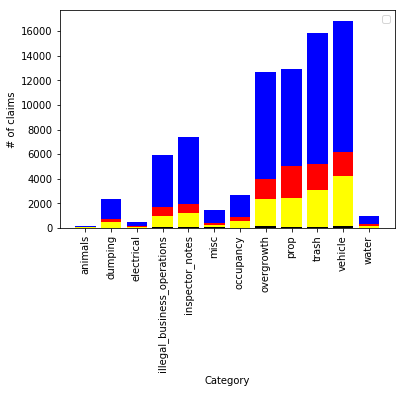

In [118]:
b0=plt.bar(x,y0,color="black") #unknown
b1=plt.bar(x,y1,bottom=y0,color='yellow') #371xx
b2=plt.bar(x,y2,bottom=y1+y0,color="red") #372xx
b3=plt.bar(x,y3,bottom=y2+y1+y0,color='blue')#373xx

plt.xlabel('Category')
plt.ylabel('# of claims')
plt.xticks(x,cat_lab,rotation=90)
plt.savefig('/Users/ghfmhf/git/data-question-2-xtreme-united/Chart_3.png')

plt.legend((y0[0],y1[0],y2[0],y3[0]),('unknown','371xx','372xx','373xx'))

plt.show()

# Complain method over time

In [120]:
vi_map_filter.columns
vi_src=vi_map_filter.drop(['City', 'ZIP',
       'Status', 'Council District', 'Last Activity Date',
       'Last Activity Result', 'category', 'Month', 'Season'],1)
vi_src.head(5)

,Request #,Date Received,Complaint Source
0,15-1114246,02/11/2015,INSPECTOR REPORTED
1,17-1153010,02/10/2017,PHONE
2,17-1153720,03/01/2017,INSPECTOR REPORTED
3,17-1159789,06/12/2017,PHONE
4,17-1154177,03/10/2017,INSPECTOR REPORTED


In [126]:
vi_src['year']=pd.to_numeric(vi_src['Date Received'].str[-4:]) #pick the month
vi_src['Complaint Source']=vi_src['Complaint Source'].str.lower()
vi_src['Complaint Source']=vi_src['Complaint Source'].str.replace(' ','_')
vi_src.head(10)

,Request #,Date Received,Complaint Source,year
0,15-1114246,02/11/2015,inspector_reported,2015
1,17-1153010,02/10/2017,phone,2017
2,17-1153720,03/01/2017,inspector_reported,2017
3,17-1159789,06/12/2017,phone,2017
4,17-1154177,03/10/2017,inspector_reported,2017
5,16-1144860,08/15/2016,phone,2016
6,17-1155441,04/12/2017,phone,2017
7,17-1155118,04/04/2017,email,2017
8,17-1160868,06/27/2017,phone,2017
9,17-1156404,04/28/2017,phone,2017


In [130]:
vi_src_g=vi_src.groupby(by=['Complaint Source','year'],as_index=False).count()
vi_src_g.columns=['src','year','freq','date']
vi_src_g=vi_src_g.drop(['date'],1)
vi_src_g.head(5)

,src,year,freq
0,cal,2016,18
1,cal,2017,50
2,codes_online,2016,804
3,codes_online,2017,1618
4,community_matters,2015,39


In [131]:
vi_src_pvt=vi_src_g.pivot(index='src',columns='year',values='freq').fillna(0)
vi_src_pvt

year,2014,2015,2016,2017
src,,,,
cal,0.0,0.0,18.0,50.0
codes_online,0.0,0.0,804.0,1618.0
community_matters,0.0,39.0,33.0,0.0
email,430.0,6211.0,7246.0,5828.0
incidents_converted_from_old_system,0.0,0.0,6.0,1.0
inspector_reported,386.0,4826.0,6416.0,13864.0
mail,1.0,29.0,49.0,39.0
metro_council,0.0,0.0,52.0,164.0
metro_pd,0.0,0.0,62.0,52.0


In [135]:
charts=sns.FacetGrid(vi_src_pvt, col="src")
charts=charts.map(plt.scatter, "2014", "2015","2016","2017")

KeyError: 'src'

# number of claims in category; within cities-do this later
#### Use the first 3 digits of ZIP codes

In [17]:
vi_map_filter.head(10)
vi_map_filter['City']=vi_map_filter['City'].str.replace('ANTICOH','ANTIOCH')  # a typo accidentally noticed

In [18]:
# Group claims by category and count each group (numbers that go into the first chart)
vi_cat_cty=vi_map_filter.groupby(by=['category','City'],as_index=False).count()

In [19]:
#removing columns that are not needed for pivot
vi_cat_cty=vi_cat_cty.drop(['Date Received', 'ZIP', 'Complaint Source','Status', 'Council District', 'Last Activity Date','Last Activity Result'],1)

In [20]:
#labeling columns
vi_cat_cty.columns=['cat','city','freq']

In [21]:
#uniforming cases
vi_cat_cty['city']=vi_cat_cty['city'].str.lower()

In [22]:
#replacing spaces
vi_cat_cty['city']=vi_cat_cty['city'].str.replace(' ','_')

In [180]:
#  vi_cat_cty

In [24]:
cat_lab=np.array(vi_cat_cnt['cat'].drop_duplicates())
# cat_lab

In [25]:
ct_lab=np.array(vi_cat_cty['city'].drop_duplicates())
# ct_lab

In [26]:
#creating pivot
vi_catcty_pvt=vi_cat_cty.pivot(index='city',columns='cat',values='freq').fillna(0)

In [27]:
# vi_catcty_pvt

In [28]:
x=np.arange(0,vi_catcty_pvt.shape[1]) # label arrays
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [29]:
chart=sns.FacetGrid(vi_cat_cty, col='city')
chart=chart.map(plt.bar,"cat","freq")

TypeError: unsupported operand type(s) for -: 'str' and 'float'